## Import the necessary dependencies

#### We are trying to import all the necessary libraries that will be needed to get the bank customer churn prediction done.

In [1]:
import pandas as pd #used for data manipulation
import numpy as np #used for matrix and mathematical operation
import matplotlib.pyplot as plt #used for visualization
%matplotlib inline
import seaborn as sns #used for visualization
import warnings #it is used to ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# read the dataset in pandas
dataset = pd.read_csv('Churn_Modelling (datasets).csv')

In [4]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#check the information about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Dropping the unnecessary columns

#### We are dropping the columns that will not be useful for our prediction

In [6]:
#drop the row number column
dataset.drop('RowNumber', axis=1, inplace=True)

#drop the surname column
dataset.drop('Surname', axis=1, inplace=True)

#drop the customer id column
dataset.drop('CustomerId', axis=1, inplace=True)


In [7]:
dataset.head() #check the update dataframe

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dataset.shape #check the shape of the data (rows and columns)

(10000, 11)

## VISUALIZATION



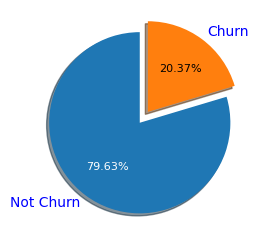

In [9]:
values = dataset.Exited.value_counts()
labels = ['Not Churn', 'Churn']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.15)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,startangle = 90, explode = explode)

plt.setp(texts, color = 'blue')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

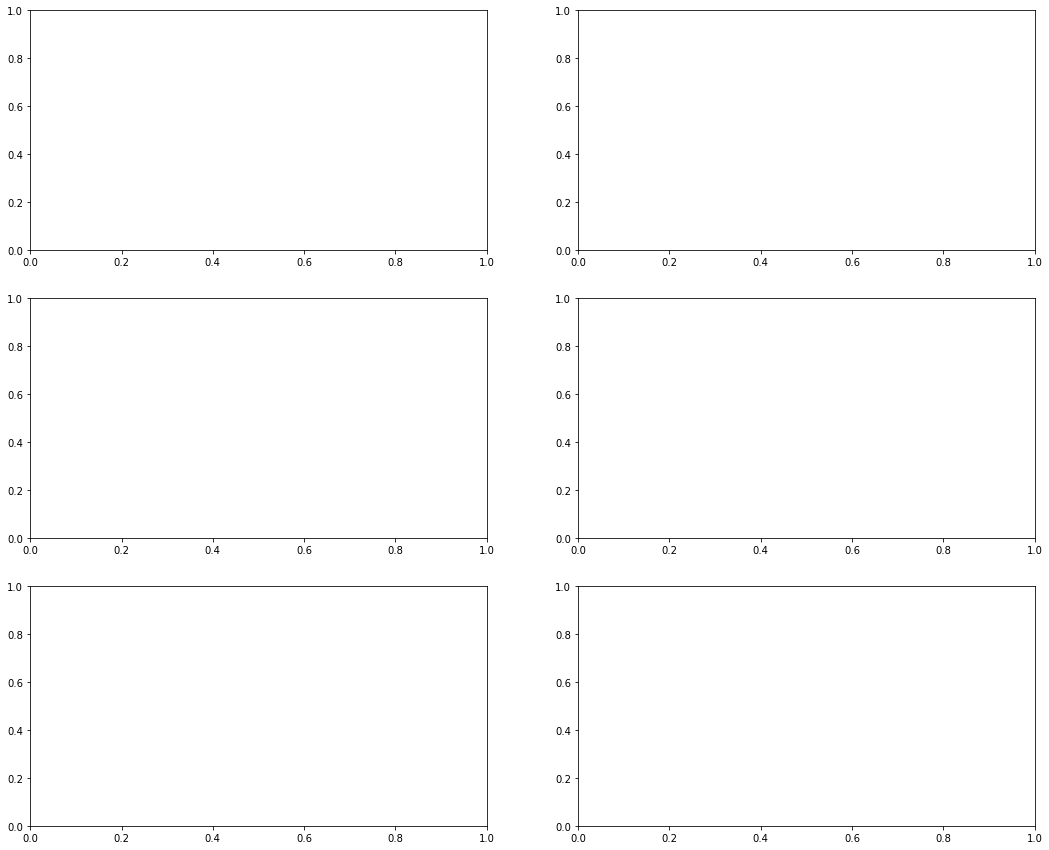

In [10]:
# using seaborn for visualization
fig, axes = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Geography', hue = 'Exited', data = dataset, axes = ax[0][0])
sns.countplot('Gender', hue = 'Exited', data = dataset, axes = axes[0][1])
sns.countplot('Tenure', hue = 'Exited', data = dataset, axes = axes[1][0])
sns.countplot('NumOfProducts', hue = 'Exited', data = dataset, axes = axes[1][1])
sns.countplot('HasCrCard', hue = 'Exited', data = dataset, axes = axes[2][0])
sns.countplot('IsActiveMember', hue = 'Exited', data = dataset, axes = axes[2][1])

plt.tight_layout()
plt.show()

In [ ]:
# customer tenure
tenure_customer_churn = dataset[dataset['Exited'] == 1].Tenure # tenure of the customers that have churn
tenure_customer_not_churn = dataset[dataset['Exited'] == 0].Tenure # tenure of the customers that have not churn

In [ ]:
#Visualizing the tenure of bank customers using histogram
plt.figure(figsize=(10,6))
plt.title('Bank customers Tenure',size=18) # title of the graph
plt.xlabel('Tenure',size=12) # label of the X axis
plt.ylabel('Number of customers',size=12) # label of the Y axis
plt.hist([tenure_customer_churn,tenure_customer_not_churn],color=['red','green'],label=['churn=Yes','churn=No'],linewidth=25) # histogram graph
plt.legend() 

We deduce from the graph that most customers have a tenure of 1 to 9, and during this period, the churn rate is high.

In [ ]:
# customers country/ location
customer_churn_country = dataset[dataset['Exited'] == 1].Geography
customer_not_churn_country = dataset[dataset['Exited'] == 0].Geography

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Bank customers Location',size=18)
plt.xlabel('Country',size=12)
plt.ylabel('Number of customers',size=12)
plt.hist([customer_churn_country ,customer_not_churn_country ],label=['Churn = Yes','Churn = No'])
plt.legend()

We deduce from the graph that the larger portion of the customer base originates from France, however, the majority of customers who have discontinued their service are from Germany, potentially due to insufficient resources given the smaller size of their customer pool.

###

In [ ]:
customer_churn_gender = dataset[dataset['Exited'] == 1].Gender
customer_not_churn_gender = dataset[dataset['Exited'] == 0].Gender

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Bank customers Gender',size=18)
plt.xlabel('Gender',size=12)
plt.ylabel('Number of customers',size=12)
plt.hist([customer_churn_gender ,customer_not_churn_gender ],label=['Churn = Yes','Churn = No'])
plt.legend()

The rate at which female customers are discontinuing their service with a bank is higher than the rate at which male customers are doing the same.

In [11]:
customer_churn_age = dataset[dataset['Exited'] == 1].Age
customer_not_churn_age = dataset[dataset['Exited'] == 0].Age

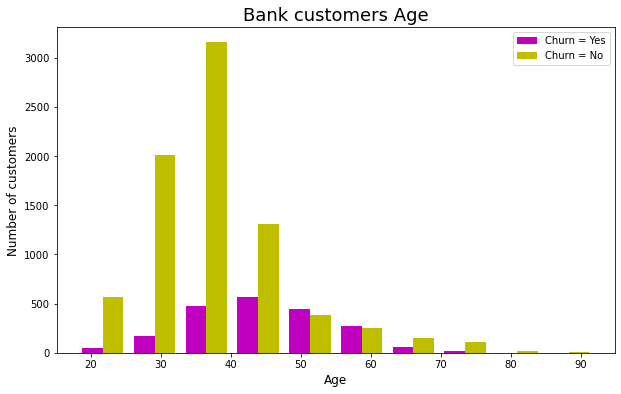

In [12]:
plt.figure(figsize=(10,6))
plt.title('Bank customers Age',size=18)
plt.xlabel('Age',size=12)
plt.ylabel('Number of customers',size=12)
plt.hist([customer_churn_age ,customer_not_churn_age ],label=['Churn = Yes','Churn = No'],color=['m','y'])
plt.legend()

In [13]:
customer_churn_balance = dataset[dataset['Exited'] == 1].Balance
customer_not_churn_balance = dataset[dataset['Exited'] == 0].Balance

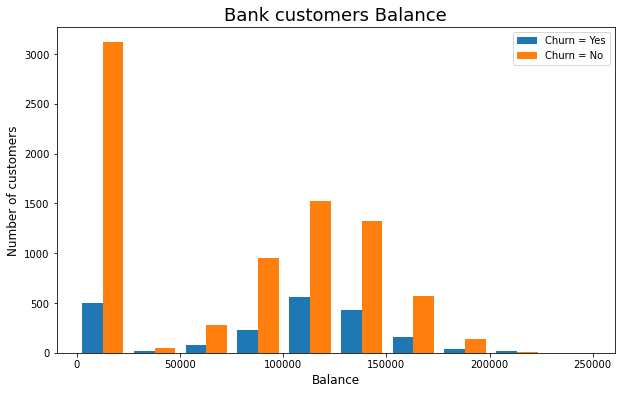

In [14]:
plt.figure(figsize=(10,6))
plt.title('Bank customers Balance',size=18)
plt.xlabel('Balance',size=12)
plt.ylabel('Number of customers',size=12)
plt.hist([customer_churn_balance ,customer_not_churn_balance ],label=['Churn = Yes','Churn = No'])
plt.legend()

## Data preprocessing

In [15]:
# we are getting the unique values in each of the column
for column in dataset:
    print(f'{column}: {dataset[column].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [16]:
# representing female as 1 and male as 0 to fit our prediction 
dataset.replace({'Female':1,'Male':0},inplace=True)

In [17]:
# to create one-hot encoded columns from the categorical column 'Geography' in the dataframe
dataset = pd.get_dummies(data=dataset, columns=['Geography'])

In [18]:
dataset

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [19]:
X = dataset.drop('Exited',axis=1)
y = dataset['Exited'] 

In [20]:
len(dataset.columns)

13

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

## Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Library used for creating and training model
import tensorflow as tf
from tensorflow import keras

In [24]:
# model building
model = keras.Sequential([
    keras.layers.Dense(6, input_shape=(12,), activation='relu'), # first layer
    keras.layers.Dense(4, input_shape=(12,), activation='relu'), # second layer
    keras.layers.Dense(1, activation='sigmoid'), # last layer
])

model.compile(optimizer='adam', # optimizer
             loss='binary_crossentropy', # loss function
             metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 22s 3ms/step - loss: 0.4838 - accuracy: 0.7835
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.7958
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.8056
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8173
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8191
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8224
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8238
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.8270
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.8295
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.831

In [25]:
# predicting the instance of a customer having the following attributes
print(model.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 1s 1s/step
[[False]]


In [26]:
# evalaute the model
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 2ms/step - loss: 0.3790 - accuracy: 0.8220


[0.3790164589881897, 0.8220000267028809]

In [27]:
# test the model
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.06429257],
       [0.20188357],
       [0.09309311],
       [0.09550839],
       [0.17936759]], dtype=float32)

In [28]:
y_test[:5] # 5 od the target variable

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

In [29]:
# the code is to get the predicted value if it's greater that 0.5 it will return 1 and otherwise 0
y_pred = []
for element in yp:
    if element >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [30]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [31]:
# the accuracy, Fi score, precision value
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1595
           1       0.63      0.30      0.41       405

    accuracy                           0.82      2000
   macro avg       0.73      0.63      0.65      2000
weighted avg       0.80      0.82      0.80      2000



Text(87.0, 0.5, 'Truth')

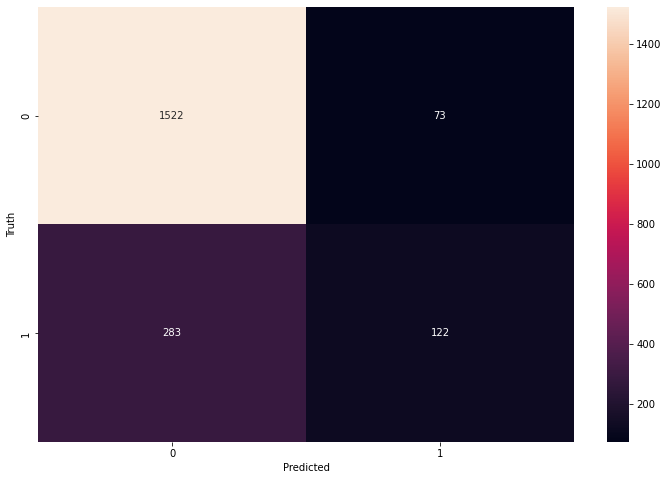

In [32]:
# visualization of prediction of all truth
con_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(12,8))
sns.heatmap(con_matrix, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# THE END